<a href="https://colab.research.google.com/github/dharambirpoddar/RL_Bird/blob/main/DNN_Bird_controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Implementation

In [188]:
pip install numpy

In [189]:
pip install matplotlib

In [190]:
pip install tensorflow

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

**Converting GPS to XYZ**

In [192]:

def gps2xy(longitude,latitude):
  # Example Coordinates (Adjust these to your actual data)
  #latitude = 28.6129  # Example: Delhi, India
  #longitude = 77.2304

  # Define the source and target coordinate systems
  wgs84 = pyproj.CRS('EPSG:4326')  # Standard GPS coordinates

  # Determine UTM zone for your location in India
  # India covers multiple UTM zones (40-47)
  # Use a reference source (e.g., https://epsg.io/) to find the zone
  # for your specific coordinates. Here, we'll assume zone 46 for Delhi.
  utm_zone = 46

  # Construct the UTM CRS for India zone
  utm_crs = pyproj.CRS(f'EPSG:326{utm_zone}')

  # Create a transformation object
  transformer = pyproj.Transformer.from_crs(wgs84, utm_crs, always_xy=True)

  # Perform the transformation
  x, y = transformer.transform(longitude, latitude)

  #print(f"Indian UTM Coordinates (Zone {utm_zone}): X = {x:.2f}, Y = {y:.2f}")
  return [x,y]

In [193]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
import pandas as pd
df_raw=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/dataMain.csv')
#print(df)

In [195]:
df = df_raw.dropna()
#gps2xy(df['Lat'],df['Lng'])

#gps2xy(df['Lat'])
xx=[]
yy=[]
for i in range(df.shape[0]):
  x=df['Lng'][i]
  y=df['Lat'][i]
  gps2xy(x,y)
  xx.append(gps2xy(x,y)[0])
  yy.append(gps2xy(x,y)[1])




Ploting

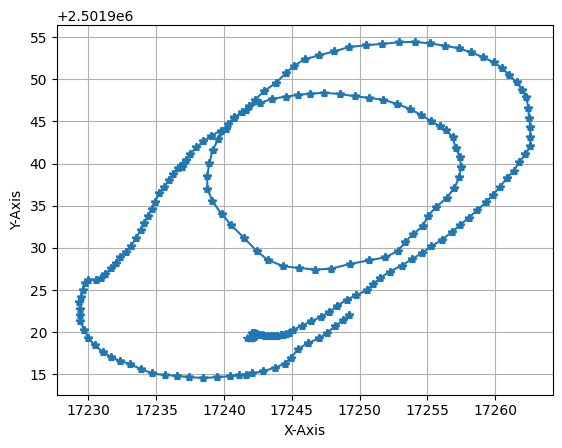

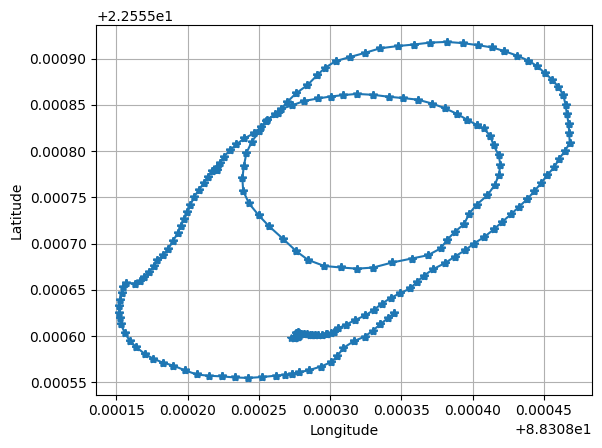

In [196]:
plt.plot(xx,yy,'*-')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.grid()
plt.show()
plt.plot(df['Lng'],df['Lat'],'*-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

Make State Variabes

In [197]:
df.at[0, 'Roll'] = 45.01
xx = xx[:df.shape[0]]
yy = yy[:df.shape[0]]
df['x_axis'] = xx
df['y_axis'] = yy
df

<ipython-input-197-e692d2a06cfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_axis'] = xx
<ipython-input-197-e692d2a06cfc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_axis'] = yy


,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,C2_Pitch,C3_Throttle,x_axis,y_axis
0,198.0,17:34.2,179654476.0,45.01,-5.59,61.29,-12.06,22.555598,88.308273,1500.0,1500.0,987.0,17241.686227,2.501919e+06
1,423.0,17:34.2,179697878.0,42.66,-4.62,60.23,-12.07,22.555598,88.308274,1500.0,1500.0,987.0,17241.881340,2.501919e+06
2,649.0,17:34.3,179733964.0,40.29,-3.70,59.38,-12.07,22.555598,88.308274,1500.0,1500.0,987.0,17241.881340,2.501919e+06
3,879.0,17:34.3,179774486.0,37.83,-2.72,58.68,-12.07,22.555598,88.308274,1500.0,1500.0,987.0,17241.881340,2.501919e+06
4,1109.0,17:34.4,179841066.0,35.23,-1.15,58.16,-12.07,22.555598,88.308274,1500.0,1500.0,987.0,17241.881340,2.501919e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,40351.0,18:16.2,221678836.0,-2.14,1.72,24.72,-1.70,22.555625,88.308345,1507.0,1501.0,1740.0,17249.209358,2.501922e+06
1050,40386.0,18:16.3,221717811.0,-0.84,-1.76,19.31,-1.70,22.555625,88.308345,1508.0,1500.0,1731.0,17249.209358,2.501922e+06
1051,40425.0,18:16.3,221758761.0,12.54,-2.35,14.11,-1.70,22.555625,88.308345,1508.0,1500.0,1724.0,17249.209358,2.501922e+06
1052,40460.0,18:16.3,221796964.0,27.96,1.52,12.23,-1.70,22.555625,88.308345,1508.0,1500.0,1724.0,17249.209358,2.501922e+06


**Max_Min Value**


In [198]:
Roll_max=45
Roll_min=-45
Pitch_min=-45
Pitch_max=45
Yaw_min=0
Yaw_max=360
C_min=900
C_max=2100


**Data Normalization**

In [199]:
df['Roll']=(df['Roll']-Roll_min)/(Roll_max-Roll_min)
df['Pitch']=(df['Pitch']-Pitch_min)/(Pitch_max-Pitch_min)
df['Yaw']=(df['Yaw']-Yaw_min)/(Yaw_max-Yaw_min)
df['C1_Roll']=(df['C1_Roll']-C_min)/(C_max-C_min)
df['C2_Pitch']=(df['C2_Pitch']-C_min)/(C_max-C_min)
df['C3_Throttle']=(df['C3_Throttle']-C_min)/(C_max-C_min)

<ipython-input-199-df3210609b08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Roll']=(df['Roll']-Roll_min)/(Roll_max-Roll_min)
<ipython-input-199-df3210609b08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pitch']=(df['Pitch']-Pitch_min)/(Pitch_max-Pitch_min)
<ipython-input-199-df3210609b08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [200]:
df


,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,C2_Pitch,C3_Throttle,x_axis,y_axis
0,198.0,17:34.2,179654476.0,1.000111,0.437889,0.170250,-12.06,22.555598,88.308273,0.500000,0.500000,0.072500,17241.686227,2.501919e+06
1,423.0,17:34.2,179697878.0,0.974000,0.448667,0.167306,-12.07,22.555598,88.308274,0.500000,0.500000,0.072500,17241.881340,2.501919e+06
2,649.0,17:34.3,179733964.0,0.947667,0.458889,0.164944,-12.07,22.555598,88.308274,0.500000,0.500000,0.072500,17241.881340,2.501919e+06
3,879.0,17:34.3,179774486.0,0.920333,0.469778,0.163000,-12.07,22.555598,88.308274,0.500000,0.500000,0.072500,17241.881340,2.501919e+06
4,1109.0,17:34.4,179841066.0,0.891444,0.487222,0.161556,-12.07,22.555598,88.308274,0.500000,0.500000,0.072500,17241.881340,2.501919e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,40351.0,18:16.2,221678836.0,0.476222,0.519111,0.068667,-1.70,22.555625,88.308345,0.505833,0.500833,0.700000,17249.209358,2.501922e+06
1050,40386.0,18:16.3,221717811.0,0.490667,0.480444,0.053639,-1.70,22.555625,88.308345,0.506667,0.500000,0.692500,17249.209358,2.501922e+06
1051,40425.0,18:16.3,221758761.0,0.639333,0.473889,0.039194,-1.70,22.555625,88.308345,0.506667,0.500000,0.686667,17249.209358,2.501922e+06
1052,40460.0,18:16.3,221796964.0,0.810667,0.516889,0.033972,-1.70,22.555625,88.308345,0.506667,0.500000,0.686667,17249.209358,2.501922e+06


In [201]:

df['Roll_diff']= df['Roll'].shift(-1) - df['Roll']
df['Pitch_diff'] = df['Pitch'].shift(-1) - df['Pitch']
df['Yaw_diff'] = df['Yaw'].shift(-1) - df['Yaw']
df['TimeUS_diff'] = df['TimeUS'].shift(-1) - df['TimeUS']
df['x_axis_diff'] = df['x_axis'].shift(-1) - df['x_axis']
df['y_axis_diff'] = df['y_axis'].shift(-1) - df['y_axis']
df['Alt_diff'] = df['Alt'].shift(-1) - df['Alt']

<ipython-input-201-f90b1f7da08e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Roll_diff']= df['Roll'].shift(-1) - df['Roll']
<ipython-input-201-f90b1f7da08e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pitch_diff'] = df['Pitch'].shift(-1) - df['Pitch']
<ipython-input-201-f90b1f7da08e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [202]:
#offset
df['x_axis'] = df['x_axis']-df['x_axis'].min()
df['y_axis'] = df['y_axis']-df['y_axis'].min()
df['Alt'] = df['Alt']-df['Alt'].min()
df['TimeUS'] = df['TimeUS']-df['TimeUS'].min()
#df['TimeUS_diff'] = df['TimeUS_diff']-df['TimeUS_diff'].min()
df.dropna(inplace=True)
df

<ipython-input-202-74d5c52293e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_axis'] = df['x_axis']-df['x_axis'].min()
<ipython-input-202-74d5c52293e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_axis'] = df['y_axis']-df['y_axis'].min()
<ipython-input-202-74d5c52293e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,...,C3_Throttle,x_axis,y_axis,Roll_diff,Pitch_diff,Yaw_diff,TimeUS_diff,x_axis_diff,y_axis_diff,Alt_diff
0,198.0,17:34.2,0.0,1.000111,0.437889,0.170250,5.10,22.555598,88.308273,0.500000,...,0.072500,12.338990,4.718225,-0.026111,0.010778,-0.002944,43402.0,0.195114,-0.028356,-0.01
1,423.0,17:34.2,43402.0,0.974000,0.448667,0.167306,5.09,22.555598,88.308274,0.500000,...,0.072500,12.534104,4.689870,-0.026333,0.010222,-0.002361,36086.0,0.000000,0.000000,0.00
2,649.0,17:34.3,79488.0,0.947667,0.458889,0.164944,5.09,22.555598,88.308274,0.500000,...,0.072500,12.534104,4.689870,-0.027333,0.010889,-0.001944,40522.0,0.000000,0.000000,0.00
3,879.0,17:34.3,120010.0,0.920333,0.469778,0.163000,5.09,22.555598,88.308274,0.500000,...,0.072500,12.534104,4.689870,-0.028889,0.017444,-0.001444,66580.0,0.000000,0.000000,0.00
4,1109.0,17:34.4,186590.0,0.891444,0.487222,0.161556,5.09,22.555598,88.308274,0.500000,...,0.072500,12.534104,4.689870,-0.015000,-0.001111,-0.001556,71659.0,0.084194,0.052883,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,40309.0,18:16.2,41981884.0,0.563333,0.586000,0.081500,15.27,22.555619,88.308340,0.506667,...,0.700000,19.410410,6.839135,-0.087111,-0.066889,-0.012833,42476.0,0.451711,0.585544,0.19
1049,40351.0,18:16.2,42024360.0,0.476222,0.519111,0.068667,15.46,22.555625,88.308345,0.505833,...,0.700000,19.862121,7.424679,0.014444,-0.038667,-0.015028,38975.0,0.000000,0.000000,0.00
1050,40386.0,18:16.3,42063335.0,0.490667,0.480444,0.053639,15.46,22.555625,88.308345,0.506667,...,0.692500,19.862121,7.424679,0.148667,-0.006556,-0.014444,40950.0,0.000000,0.000000,0.00
1051,40425.0,18:16.3,42104285.0,0.639333,0.473889,0.039194,15.46,22.555625,88.308345,0.506667,...,0.686667,19.862121,7.424679,0.171333,0.043000,-0.005222,38203.0,0.000000,0.000000,0.00


In [203]:
#Rearrange Coloumn Dataframe
df=df[['Seq','TimeUS','TimeUS_diff','Roll','Roll_diff','Pitch','Pitch_diff','Yaw','Yaw_diff','x_axis','x_axis_diff','y_axis','y_axis_diff','Alt','Alt_diff','C1_Roll','C2_Pitch','C3_Throttle']]
df


,Seq,TimeUS,TimeUS_diff,Roll,Roll_diff,Pitch,Pitch_diff,Yaw,Yaw_diff,x_axis,x_axis_diff,y_axis,y_axis_diff,Alt,Alt_diff,C1_Roll,C2_Pitch,C3_Throttle
0,198.0,0.0,43402.0,1.000111,-0.026111,0.437889,0.010778,0.170250,-0.002944,12.338990,0.195114,4.718225,-0.028356,5.10,-0.01,0.500000,0.500000,0.072500
1,423.0,43402.0,36086.0,0.974000,-0.026333,0.448667,0.010222,0.167306,-0.002361,12.534104,0.000000,4.689870,0.000000,5.09,0.00,0.500000,0.500000,0.072500
2,649.0,79488.0,40522.0,0.947667,-0.027333,0.458889,0.010889,0.164944,-0.001944,12.534104,0.000000,4.689870,0.000000,5.09,0.00,0.500000,0.500000,0.072500
3,879.0,120010.0,66580.0,0.920333,-0.028889,0.469778,0.017444,0.163000,-0.001444,12.534104,0.000000,4.689870,0.000000,5.09,0.00,0.500000,0.500000,0.072500
4,1109.0,186590.0,71659.0,0.891444,-0.015000,0.487222,-0.001111,0.161556,-0.001556,12.534104,0.084194,4.689870,0.052883,5.09,0.45,0.500000,0.500000,0.072500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,40309.0,41981884.0,42476.0,0.563333,-0.087111,0.586000,-0.066889,0.081500,-0.012833,19.410410,0.451711,6.839135,0.585544,15.27,0.19,0.506667,0.501667,0.700000
1049,40351.0,42024360.0,38975.0,0.476222,0.014444,0.519111,-0.038667,0.068667,-0.015028,19.862121,0.000000,7.424679,0.000000,15.46,0.00,0.505833,0.500833,0.700000
1050,40386.0,42063335.0,40950.0,0.490667,0.148667,0.480444,-0.006556,0.053639,-0.014444,19.862121,0.000000,7.424679,0.000000,15.46,0.00,0.506667,0.500000,0.692500
1051,40425.0,42104285.0,38203.0,0.639333,0.171333,0.473889,0.043000,0.039194,-0.005222,19.862121,0.000000,7.424679,0.000000,15.46,0.00,0.506667,0.500000,0.686667


In [225]:
np.mean((df['TimeUS_diff']))

40059.282051282054

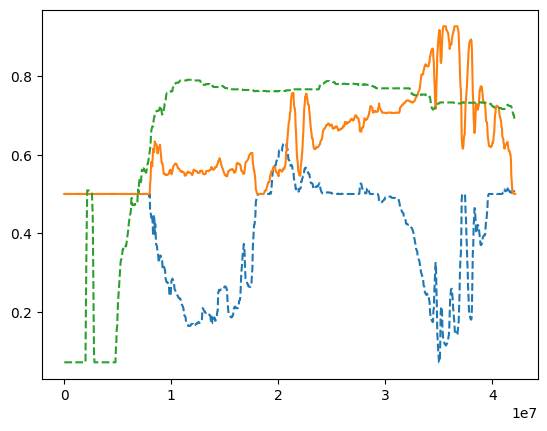

In [204]:
#plt.plot(df['Roll'])
#plt.plot(df['Pitch'])
#plt.show()
plt.plot(df['TimeUS'],df['C1_Roll'],'--')
plt.plot(df['TimeUS'],df['C2_Pitch'],'-')
plt.plot(df['TimeUS'],df['C3_Throttle'], '--')

plt.show()


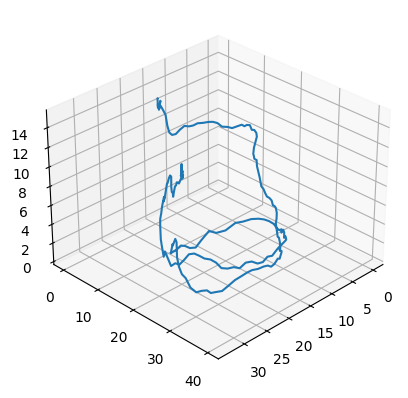

In [205]:
from mpl_toolkits.mplot3d import Axes3D

# Your data loading code
x = df['x_axis']
y = df['y_axis']
z = df['Alt']

# Create the figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot your 3D line
ax.plot(x, y, z, label='3D Line')


def change_view(elevation, azimuth):
    ax.view_init(elev=elevation, azim=azimuth)
    fig.canvas.draw_idle()

# Example: Change to a specific view
change_view(30, 45)

# Show the plot
plt.show()

**Learning**

In [263]:

#X = df[['TimeUS_diff','Roll','Roll_diff','Pitch','Pitch_diff','Yaw','Yaw_diff','x_axis','x_axis_diff','y_axis','y_axis_diff','Alt','Alt_diff']]
X = df[['TimeUS_diff','Roll_diff','Pitch_diff','Yaw_diff','x_axis_diff','y_axis_diff','Alt_diff']]
y = df[['C1_Roll','C2_Pitch','C3_Throttle']]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [264]:
y_train

,C1_Roll,C2_Pitch,C3_Throttle
323,0.209167,0.550833,0.777500
501,0.611667,0.561667,0.761667
314,0.172500,0.554167,0.788333
430,0.265000,0.596667,0.764167
940,0.330000,0.793333,0.731667
...,...,...,...
330,0.193333,0.558333,0.779167
466,0.500000,0.504167,0.761667
121,0.500000,0.500000,0.156667
1044,0.503333,0.530000,0.718333


In [265]:
# prompt: Using dataframe y_train:

y_train.describe()


,C1_Roll,C2_Pitch,C3_Throttle
count,737.000000,737.000000,737.000000
mean,0.408442,0.632745,0.663772
std,0.135491,0.115379,0.211221
min,0.072500,0.500000,0.072500
25%,0.272500,0.548333,0.718333
50%,0.500000,0.613333,0.760833
75%,0.500000,0.706667,0.768333
max,0.630000,0.925833,0.790000


In [266]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(7,)))  # Input layer, 32 neurons
model.add(Dense(64, activation='sigmoid'))  # Hidden layer
model.add(Dense(16, activation='sigmoid'))  # Hidden Layer
model.add(Dense(3, activation='sigmoid'))  # Output layer with 3 neurons (matching your output parameters)


In [267]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])


In [268]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
24/24 [==============================] - 2s 19ms/step - loss: 0.0344 - accuracy: 0.1452 - val_loss: 0.0276 - val_accuracy: 0.7437
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.7042 - val_loss: 0.0277 - val_accuracy: 0.7437
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 0.7042 - val_loss: 0.0275 - val_accuracy: 0.7437
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 0.7042 - val_loss: 0.0275 - val_accuracy: 0.7437
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.7042 - val_loss: 0.0274 - val_accuracy: 0.7437
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 0.7042 - val_loss: 0.0276 - val_accuracy: 0.7437
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0255 - accuracy: 0.7042 - val_loss: 0.0274 - val_accuracy: 0.7437
Epoch 8/100


In [269]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 32)                256       
                                                                 
 dense_69 (Dense)            (None, 64)                2112      
                                                                 
 dense_70 (Dense)            (None, 16)                1040      
                                                                 
 dense_71 (Dense)            (None, 3)                 51        
                                                                 
Total params: 3459 (13.51 KB)
Trainable params: 3459 (13.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [270]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.027552401646971703
Test accuracy: 0.7436708807945251


In [271]:
X_new=[[40000,0.4,0.2,0.5,0.4,0.2,0.3]]
predictions = model.predict(X_new)
print(predictions)

1/1 [==============================] - 0s 80ms/step
[[0.40902928 0.639932   0.6659158 ]]


# Testing Curves



Spiral

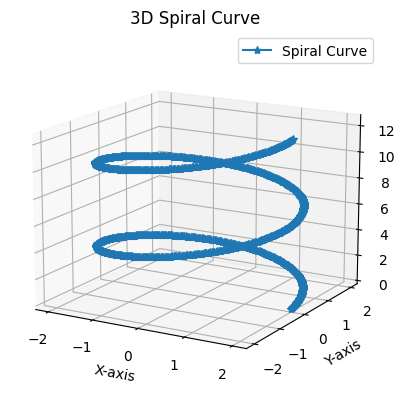

In [272]:


# Define parameters for the spiral
theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * np.sin(theta)
z = b * theta

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Spiral Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=15, azim=-60)  # Example view angles

plt.show()



In [295]:
df_sp=pd.DataFrame(columns=['TimeUS','Roll','Pitch','Yaw','x_ax','y_ax','Alt'],index=range(1000))
df_sp['x_ax']=x
df_sp['y_ax']=y
df_sp['Alt']=z
df_sp['TimeUS']=40000
df_sp['Roll']=0
df_sp['Pitch']=0.5
df_sp['Yaw']=0.5
df_sp


,TimeUS,Roll,Pitch,Yaw,x_ax,y_ax,Alt
0,40000,0,0.5,0.5,2.000000,0.000000,1
1,40000,0,0.5,0.5,1.999842,0.025158,1
2,40000,0,0.5,0.5,1.999367,0.050316,1
3,40000,0,0.5,0.5,1.998576,0.075474,1
4,40000,0,0.5,0.5,1.997469,0.100632,1
...,...,...,...,...,...,...,...
995,40000,0,0.5,0.5,1.997469,25.032110,1
996,40000,0,0.5,0.5,1.998576,25.057268,1
997,40000,0,0.5,0.5,1.999367,25.082425,1
998,40000,0,0.5,0.5,1.999842,25.107583,1


In [296]:
predictions = model.predict(df_sp)
print(predictions)

32/32 [==============================] - 0s 1ms/step
[[0.40902925 0.639932   0.6659158 ]
 [0.40902925 0.639932   0.6659158 ]
 [0.40902925 0.639932   0.6659158 ]
 ...
 [0.40902925 0.639932   0.6659158 ]
 [0.40902928 0.639932   0.6659158 ]
 [0.40902928 0.639932   0.6659158 ]]


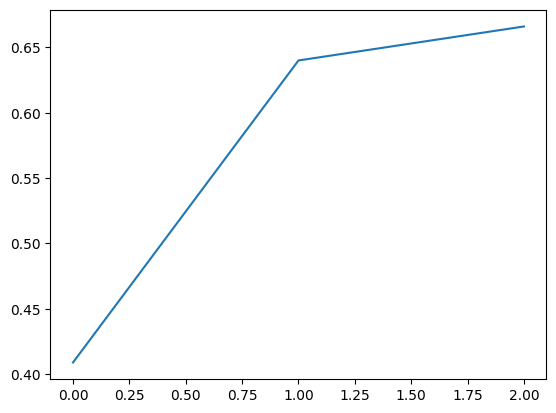

In [297]:
plt.plot(predictions[1])

Circle

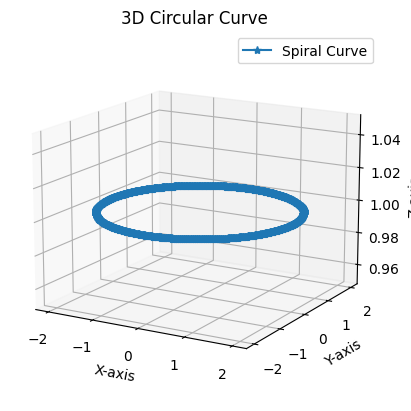

In [273]:

theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * np.sin(theta)
z = b

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Circular Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=15, azim=-60)

plt.show()

sine curve

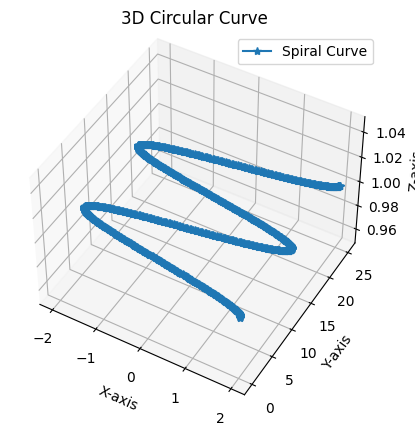

In [274]:
theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * theta
z = b

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Circular Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=45, azim=-60)  # Example view angles

plt.show()